<a href="https://colab.research.google.com/github/yexf308/AdvancedMachineLearning/blob/main/Manifold_Learning_diffusion_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline 
from IPython.display import Image
import numpy.linalg as LA
import scipy
from scipy import linalg

Populating the interactive namespace from numpy and matplotlib


# Diffusion Map
Diffusion maps leverages the relationship
between heat diffusion and a random walk (Markov Chain); an analogy is drawn
between the diffusion operator on a manifold and a Markov transition matrix operating
on functions defined on a weighted graph whose nodes were sampled from
the manifold. A diffusion map, which maps coordinates between data and diffusion
space, aims to re-organize data according to a new metric.

$\def\m#1{\mathbf{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$

## A random walk perspective of spectral clustering

A bit more math! There is an interesting connection between spectral clustering and random walks on a graph. 

We can construct the following random walks. 
Consider the **Markov chain** defined on the similarity graph $G=(V, E, \m{W})$ with transition matrix $\m{P}=\m{D}^{-1}\m{W}$. (Verify it!)

The chain is finite, and if the graph is connected, then the Markov chain
is irreducible and thus also positive recurrent. Moreover, if the Markov chain is aperiodic, it possesses a
unique stationary distribution $\pi$ and the chain always converges to the stationary distribution, where $\pi_i=d_i/\text{Vol}(V)$.


This Markov chain is reversible since  $\pi_i P_{ij}=\pi_j P_{ji}$. 







### Review of Markov Chain
The Markov matrix $M$ satisfies the following properties by Perron-Frobenius Theory. 

**Proposition:**
- $M$ has eigenvalues $-1 \le|\lambda(M)|\le 1$

- $M$ is irreducible, if and only if any $(i,j)$, there exists $t$, s.t. $M^t_{ij}>0$ $⟺$ The corresponding directed graph $G=(V,E)$ is connected. 

- $M$ is irreducible $⇒$ $\lambda_{\max}=1$ is simple. 

- $M$ is primitive if and only if any $t>0$, s.t. any $(i,j)$, $A^t_{ij}>0⟺$ Graph
$G = (V,E)$ is path-$t$ connected, i.e. any pair of nodes are connected by a
path of length no more than $t$.

- Primitive markov matrices are the same as irreducible aperiodic markov matrices.

- $M$ is irreducible and $M_{ii}>0$ for all $i$ $⇒$ $M$ is primitive. 



## Random walk on graph and spectral clustering
**Theorem:** Let $G=(V, E, \m{W})$ be connected but non-bipartite. Assume that we run the Markov chain with the transition matrix $\m{P}$, $\{X_t, t=0,1,2,\dots\}$ starting with $X_0$ sampled from the stationary distribution $\pi$. Then
\begin{align}
\text{NCut}(A, \bar{A}) =P(X_{t+1}\in \bar{A}|X_t\in A) +P(X_{t+1}\in A|X_t\in \bar{A}) 
\end{align}

**Proof:** Since $X_0$ starts with the stationary distribution $\pi$, the all $X_t$ will follow the stationary distribution $\pi$.
First, for any subset $A\subset V$,
\begin{align}
P(X_{t+1}\in \bar{A}, X_t\in A)  &= \sum_{i\in A, j\in \bar{A}}P(X_{t+1}=j, X_t=i)  \\
&= \sum_{i\in A, j\in \bar{A}}P(X_{t+1}=j| X_t=i)P(X_t=i) \\
&=\sum_{i\in A, j\in \bar{A}} p_{ij}\pi_i = \sum_{i\in A, j\in \bar{A}}  \frac{w_{ij}}{d_i}\frac{d_i}{\text{Vol}(V)} = \frac{\text{Cut}(A, \bar{A})}{\text{Vol}(V)}
\end{align}

Second 
\begin{align}
P(X_{t+1}\in \bar{A}|X_t\in A) = \frac{P(X_{t+1}\in \bar{A}, X_t\in A) }{P(X_t\in A)}= \frac{\text{Cut}(A, \bar{A})/\text{Vol}(V)}{\text{Vol}(A)/\text{Vol}(V)} = \frac{\text{Cut}(A, \bar{A})}{\text{Vol}(A)}. 
\end{align}
Similarly, we can show that 
\begin{align}
P(X_{t+1}\in A|X_t\in \bar{A})=\frac{\text{Cut}(A, \bar{A})}{\text{Vol}(\bar{A})}
\end{align}
Combining the two equations together would complete the proof.


This means that we are looking for a cut such that a random walk spends more time transitioning to
similar points, and rarely makes transitions from $A$ to $\bar{A}$ or vice versa.

## Diffusion distance 
Using the random walk perspective, one can define the diffusion distances between the vertices of the graph:

- **Diffusion distance :** Define based on powers of the transition
matrix, i.e., $\m{P}^t$.
   - $\m{P}$ has the same eigenvectors as $\m{L}^{\text{rw}}$, i.e, $\mb{1}=\m{v}_1, \m{v}_2, \dots, \m{v}_N$.

   - The $t$-step diffusion distance between vertices
$i$ and $j$ is
$$D_t(i,j)=\sqrt{\sum_{l=2}^N\lambda_l^{2t}\left(\m{v}_l(i)-\m{v}_l(j)\right)^2} $$

  - This is equal to the Euclidean distance
on the embedding space. 
  $$\m{x}^{(i)}\rightarrow \m{z}^{(i)}=[\lambda_2^t \m{v}_2(i),\dots,\lambda_N^t \m{v}_N(i) ] $$
  Note that the columns can be truncated
for reduced dimensionality.
  
  - We can specify a constant $\delta$, and only the eigenvectors for which the eigenvalues satisfy $|\lambda_k|^t>\delta$, When t is enough large, we can use the truncated diffusion distance:
  $$D^{\delta}_t(i,j) = \sqrt{\sum_{k: |\lambda_k|^t>\delta}\lambda_k^{2t}\left(\m{v}_k(i)-\m{v}_k(j)\right)^2} $$
  as an approximation of the weighted $l^2$ distance of the probability clouds. 

  - Note the Laplacian Eigenmap embeds to $[\m{v}_2, \dots, \m{v}_{d+1}]$ which is the spectral case for diffusion map at $t=0$. 

  - Diffusion distance depends on time scale parameter t which is hard to select in
applications.

  - The actual way to calculate eigenpair of $\m{P}$ is by first computing the eigenpairs of the symmetric
matrix $\m{M}_s = \m{D}^{-1/2}\m{W}\m{D}^{-1/2}$ and denoted $\tilde \lambda_i$ and $\tilde \varphi_i$. Then taking $\lambda_i = \tilde \lambda_i$ and $\m{v}_i=\m{D}^{-1/2}\tilde \varphi_i$. this method is more efficient and numerically stable because $\m{M}_s$ is a real symmetric matrix. Use the commend `eigh`. 
 

## Diffusion Maps Algorithm
**Input:** Dataset $\m{X}$, kernel function $\kappa$, diffusion parameter $t$

**Output**: diffusion mapping $\m{v}$
- Construct weight matrix $W$, $W_{ij}=\kappa(\m{x}^{(i)}, \m{x}^{(j)})$

- Construct symmetric matrix $\m{M}_s= \m{D}^{-1/2}\m{W}\m{D}^{-1/2}$. 

- Compute eigenpairs $(\tilde \lambda_i, \tilde \varphi_i)$ of $\m{M}_s$. 

- Compute (normalized) eigenvectors of $\m{M}$ as $\m{v}_i= \m{D}^{-1/2}\tilde \varphi_i/\|\m{D}^{-1/2}\tilde \varphi_i\|$.

- Construct diffusion map $\Phi_t(\m{x}^{(i)})=\m{z}^{(i)}=[\lambda_2^t \m{v}_2(i),\dots,\lambda_N^t \m{v}_N(i) ]$.

### Intuition in diffusion distance
- Diffusion distance is to describe "perceptual distances"
of points in the same and different clusters.

- Diffusion distances reflect average path length connecting points via random walks.

- Small $t$ represents local random walk, where diffusion distances reflect local geometric structure. 

- Large $t$ represents global random walk, where diffusion distances reflect large scale cluster or connected components.

In [ ]:
display(Image(url='https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/two_balls.png?raw=true', width=800))

Here $d_t(A,B)\gg d_t(B,C)$ while graph
shortest path $d_{geod}(A, B)\approx d_{geod}(B,C)$. It shows
that points within the same cluster have small diffusion distances while in different clusters have large diffusion distances. This is because the metastability phenomenon of random walk on graphs where each cluster represents a metastable state.

## Properties of Diffusion Distance
- We now give a simple upper and lower error bound for the truncated diffusion distance.
$$0\le D_t^2(i,j) - [D_t^\delta(i,j)]^2\le \frac{2\delta^2}{d_{\min}}(1-\delta_{ij}) $$
where $d_{\min}=\min_{i} d_i$ with $d_i=\sum_j w_{ij}$ is the $i$-th degree. 

- diffusion distance is NOT a distance. 
  - Since the diffusion map is an embedding into the Euclidean space, the diffusion distance inherits all the metric properties of $\mb{R}^N$ such as symmetry, nonnegativity
and the triangle inequality.

  - Suppose $D_t^2(i,j)=0$, then $\sum_{l=2}^N\lambda_l^{2t}\left(\m{v}_l(i)-\m{v}_l(j)\right)^2 = 0$. So it follows $\m{v}_l(i)=\m{v}_l(j)$ for $\lambda_l\ne 0$. But there is still the possibility
that $\m{v}_l(i)\ne\m{v}_l(j)$ for $\lambda_l=0$. 
  - **Proposition**: $D_t^2(i,j)=0$ with $i\ne j$ occurs if and only
if node $i$ and $j$ have the exact same neighbors and proportional weights, i.e., for all $k\in V$,
 $$W_{ik} = \alpha W_{jk},  \alpha>0.$$

 Example: In a graph with three nodes $V=\{1,2,3\}$ and two edges, say $E=\{(1,2), (2,3)\}$. The diffusion distance between nodes 1 and 3 is 0. Here the
transition matrix is 
\begin{align}P=
\begin{pmatrix}
0 & 1 & 0 \\
1/2 & 0 & 1/2\\
0 & 1 &0
\end{pmatrix}
\end{align}

## Commuter distance 

- **Commute distance:** Defined based on the pseudoinverse of the
graph Laplacian, i.e., $\m{L}^{\dagger}$.
  - The commute distance $c_{ij}$ (also called resistance distance) between two vertices $i,j\in V$ of the graph is the expected time it takes the random walk to travel from one vertex to the other vertex and back. It is also called **mean first passage time**
  $$c_{ij}=\tau_{ij}+\tau_{ji}, \ \ \tau_{ij}=\mb{E}\left(\min_{n\ge 0}\{X_n=j\}|X_0=i\right) $$

  - Unlike the shortest-path distance, the commute distance $c_{ij}$ is small only
when there are many different short ways to get from one vertex to another, i.e., it is quicker for the random walk from $i$ to $j$ and vice versa. 

 - **Theorem:** For any connected, undirected graph  $G=(V, E, \m{W})$, the
commute time between any two vertices $i,j\in V$ is 
$$c_{ij}= \text{Vol}(V)\cdot \left(l_{ii}^\dagger -2 l_{ij}^\dagger+l_{jj}^\dagger\right)= \text{Vol}(V) \cdot (\m{e}_i-\m{e}_j)^\top \m{L}^\dagger (\m{e}_i-\m{e}_j)$$

    where 

    - $\m{L}^\dagger $: Moore-Penrose pseudoinverse of the graph Laplacian $\m{L}$.

    - $\m{e}_i$: the $i$-th standard basis vector for $\mb{R}^N$.


## Property of commuter distance
We will show that the (average) commute time between $i$ and $j$, $\tau_{ij}+\tau_{ji}$, in fact leads to an Euclidean distance metric which can be used for
embedding, i.e., there exists some Euclidean coordinates for $i$ and $j$, the commuter distance is the square distance under this coordiante. 

### Definition
Remind the definition 
- **first passage time**: $T_{ij}= \min_{n\ge 0}\{X_n=j|X_0=i\}$

- **mean First Passage Time**: $\tau_{ij}=\mb{E}(T_{ij})$.

- $T^+_{ij}= \min_{n\ge 1}\{X_n=j|X_0=i\}$

- $\tau^+_{ij}=\mb{E}(T^+_{ij})$ and $\tau^+_{ii}$ is also called **mean first return time**.

In [ ]:
def compute_distances(X):
    N = len(X)
    D = np.zeros([N, N])
    for i in range(N):
        for j in range(N):
            D[i, j] = np.sqrt(sum((X[i] - X[j])**2)) # Euclidean distance
    return D

In [ ]:
def compute_weight_matrix(D, kernel_type,sigma=None):
  if kernel_type=='gaussian':
    W = np.exp(-D*D/(sigma**2))
  return W

In [ ]:
def diff_map_info(W):
    '''
    Construct the information necessary to easily construct diffusion map for any t
    Inputs:
        W: the weight matrix 
    Outputs:
        diff_vec    a numpy array of size n x n-1 containing the n-1 nontrivial eigenvectors of Markov matrix as columns
        diff_eig    a numpy array of size n-1 containing the n-1 nontrivial eigenvalues of Markov matrix
        We assume the convention that the coordinates in the diffusion vectors are in descending order
        according to eigenvalues.
    '''

    # get symmetric matrix M_s
    sum_W = W.sum(axis=1) # degree matrix of W = sum of W-th rows

    #semi_D = linalg.fractional_matrix_power(D, -1/2) # power of (-1/2)
    semi_D = diag(sum_W**(-1/2))
    M_s = semi_D @ W @ semi_D
    eig_val, eig_vector = np.linalg.eigh(M_s) # eigenpairs of M_s

    eig_vector_normalized = semi_D.dot(eig_vector) / LA.norm(semi_D.dot(eig_vector), axis = 0) # normalzied eigenvector

    # discard trivial eigenvalue and eigenvector
    nontrivial_eig_val = eig_val[:-1]
    nontrivial_eig_vector = eig_vector_normalized[:,:-1] # discard last column

    # ascending order
    diff_eig = nontrivial_eig_val[::-1]
    diff_vec = np.flip(nontrivial_eig_vector, axis = 1)

    #return the info for diffusion maps
    return diff_vec, diff_eig 


In [ ]:
def get_diff_map(diff_vec, diff_eig, t):
    '''
    Construct a diffusion map at t from eigenvalues and eigenvectors of Markov matrix
    Inputs:
        diff_vec    a numpy array of size n x n-1 containing the n-1 nontrivial eigenvectors of Markov matrix as columns
        diff_eig    a numpy array of size n-1 containing the n-1 nontrivial eigenvalues of Markov matrix
        t           diffusion time parameter t
    Outputs:
        diff_map    a numpy array of size n x n-1, the diffusion map defined for t
    '''

    diff_eig_power_t = diff_eig**t # t(step-size)-th power eigenvalues
    diff_map = diff_eig_power_t * diff_vec

    return diff_map

## Swiss Roll

In [ ]:
from sklearn.datasets import make_swiss_roll
import plotly.express as px

n_samples = 1000
noise = 0.05
X, color = make_swiss_roll(n_samples, noise=noise)


In [ ]:
sigma = 2 # sigma =4 or 5
t = 1
D = compute_distances(X)
W_sigma3 = compute_weight_matrix(D, "gaussian", sigma)
diff_vec_sigma3, diff_eig_sigma3 = diff_map_info(W_sigma3)
diff_map_sigma3 = get_diff_map(diff_vec_sigma3, diff_eig_sigma3, t)

Text(0.5, 0.98, 'Diffusion map using Gaussian kernal with sigma = 3 and t = 1 (2D)')

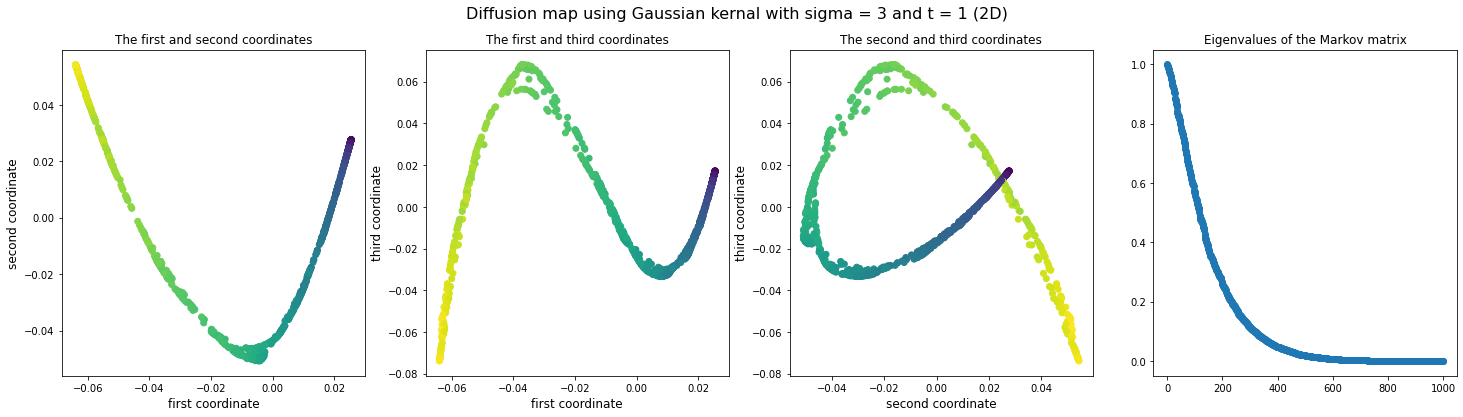

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(25,6))

axes[0].scatter(x=diff_map_sigma3[:,0], y=diff_map_sigma3[:,1],c=color)
axes[0].set_xlabel('first coordinate', size=12)
axes[0].set_ylabel('second coordinate', size=12)
axes[0].set_title("The first and second coordinates" )

axes[1].scatter(x=diff_map_sigma3[:,0], y=diff_map_sigma3[:,2],c=color)
axes[1].set_xlabel('first coordinate', size=12)
axes[1].set_ylabel('third coordinate', size=12)
axes[1].set_title("The first and third coordinates" )

axes[2].scatter(x=diff_map_sigma3[:,1], y=diff_map_sigma3[:,2],c=color)
axes[2].set_xlabel('second coordinate', size=12)
axes[2].set_ylabel('third coordinate', size=12)
axes[2].set_title("The second and third coordinates" )

axes[3].scatter(arange(len(diff_eig_sigma3)),diff_eig_sigma3)
axes[3].set_title("Eigenvalues of the Markov matrix" )

plt.suptitle("Diffusion map using Gaussian kernal with sigma = 3 and t = 1 (2D)", size=16)